<a href="https://colab.research.google.com/github/tuomaseerola/music21/blob/master/corpus_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Music21 Corpus Analysis

**Music and Science (Year 2 UG Module)**

February 2020, Tuomas Eerola, Durham University, UK.

This is a companion to the first music21 demo in Music and Science Module. The Colab ([Google Colaboratory](http://colab.research.google.com/) idea is from Myke Cuthbert, which allows any computer to run music21 analyses without fuss in a browser window. These demos have been build around the nice examples provided in [_music21_ Documentation](http://web.mit.edu/music21/doc/index.html) and edited with Durham music students at demo sessions.


## 1 Build music21 environment in Colab

First we build a virtual machine that will be able run _music21_ in your browser.


### 1.1 Install Music21

In [17]:
!pip install --upgrade music21

Requirement already up-to-date: music21 in /usr/local/lib/python3.6/dist-packages (5.7.2)


### 1.2 Install musescore to display scores


In [18]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/mscore-ubuntu/mscore-stable/ubuntu bionic InRelease
Fetched 88.7 kB in 2s (41.0 kB/s)
Readi

### 1.3 Modify the environment

In [19]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.3).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.


In [20]:
!sh -e /etc/init.d/x11-common start

 * Setting up X socket directories...
   ...done.


In [0]:
import os
os.putenv('DISPLAY', ':99.0')

In [0]:
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset

In [0]:
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

### 1.4 Test that everything works

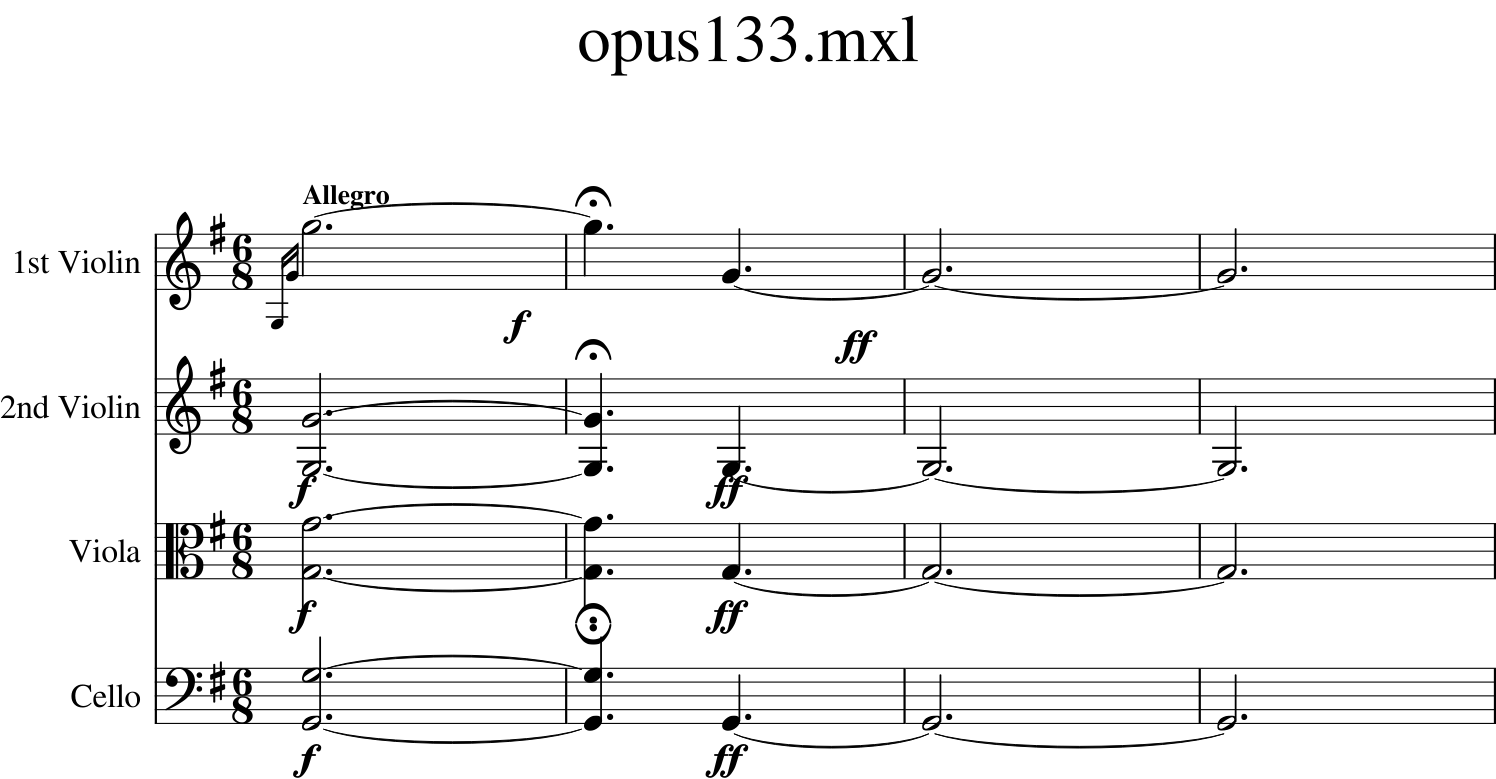

In [25]:
opus133 = corpus.parse('beethoven/opus133.mxl') # we "parse" one specific work from the corpus
opus133.measures(1, 4).show() # Show first 4 bars

## 2 Corpus analysis
In the previous demo we got to know _music21_ and extracted some interesting musical properties from single pieces of music. Now it is time to apply the analyses to a corpus, a collection of pieces.

### 5.1 Corpus and metadata
Let's work with the build-in corpus of *Music21*. The system has neat architecture for searching, combining and loading all pieces with certain metadata. Also, it is typical that the pieces themselves contain different types of metadata.

[('arranger', 'Michael Scott Cuthbert'), ('composer', 'Arcangelo Corelli'), ('copyright', '© 2014, Creative Commons License (CC-BY)'), ('movementName', 'Sonata da Chiesa, No. I (opus 3, no. 1)')]
Violino I.
Violino II.
Violone e Organo


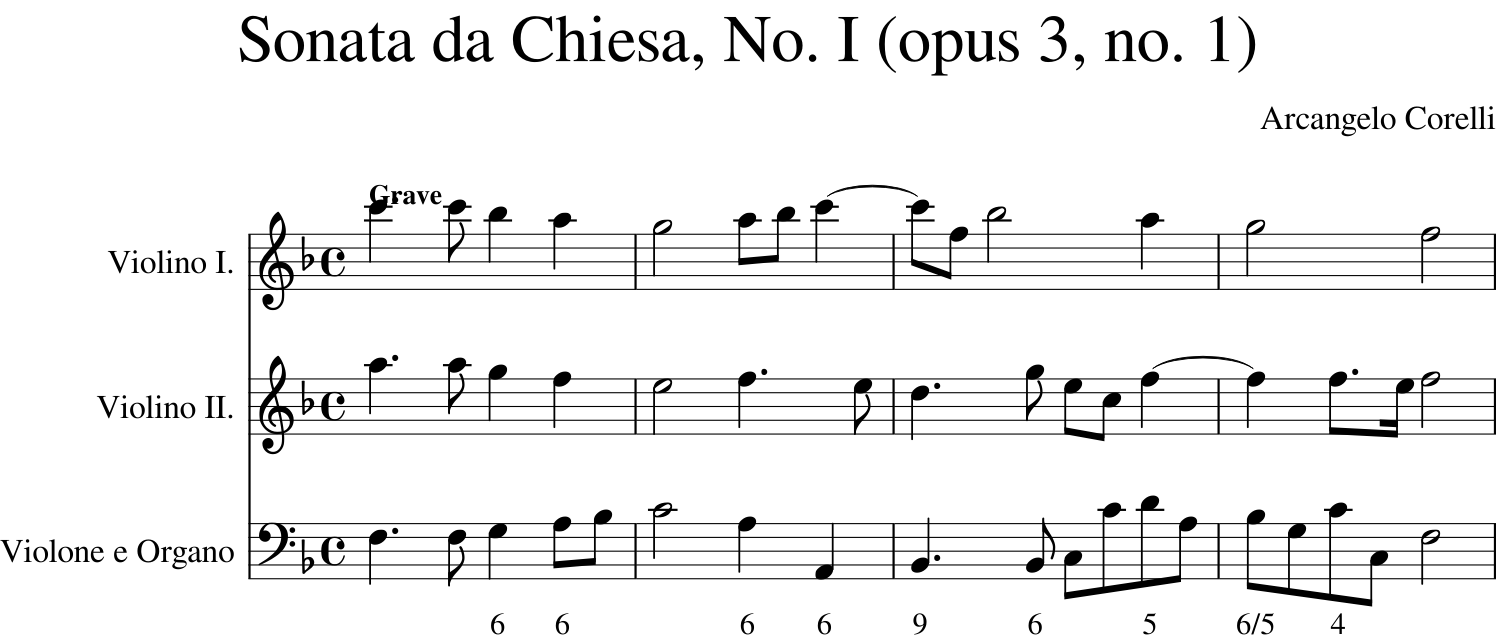

In [27]:
# What other information besides the score do we have about a piece of music?
opus3no1 = corpus.parse('corelli/opus3no1/1grave') # Get one Corelli Sonata
print(opus3no1.metadata.all()) # Show metadata

partStream = opus3no1.parts.stream() # Show the list of instruments
for p in partStream:
    print(p.id)

opus3no1.measures(1,4).show()        # Plot first 4 bars

In [46]:
# Let's select a corpus of all works composed by Giovanni Palestrina
corpus1 = corpus.search(composer='palestrina')
print(corpus1)

<music21.metadata.bundles.MetadataBundle {1318 entries}>


In [47]:
# From this corpus, let us find works that are titled 'Kyrie'
corpus2 = corpus1.search(title='Kyrie')
print(corpus2)

<music21.metadata.bundles.MetadataBundle {102 entries}>


In [48]:
# What about even more specific, compositions that have the word "Papae" in it in Palestrina's Kyrie corpus?
corpus3 = corpus2.search(parentTitle='Papae')
print(corpus3)

<music21.metadata.bundles.MetadataBundle {1 entry}>


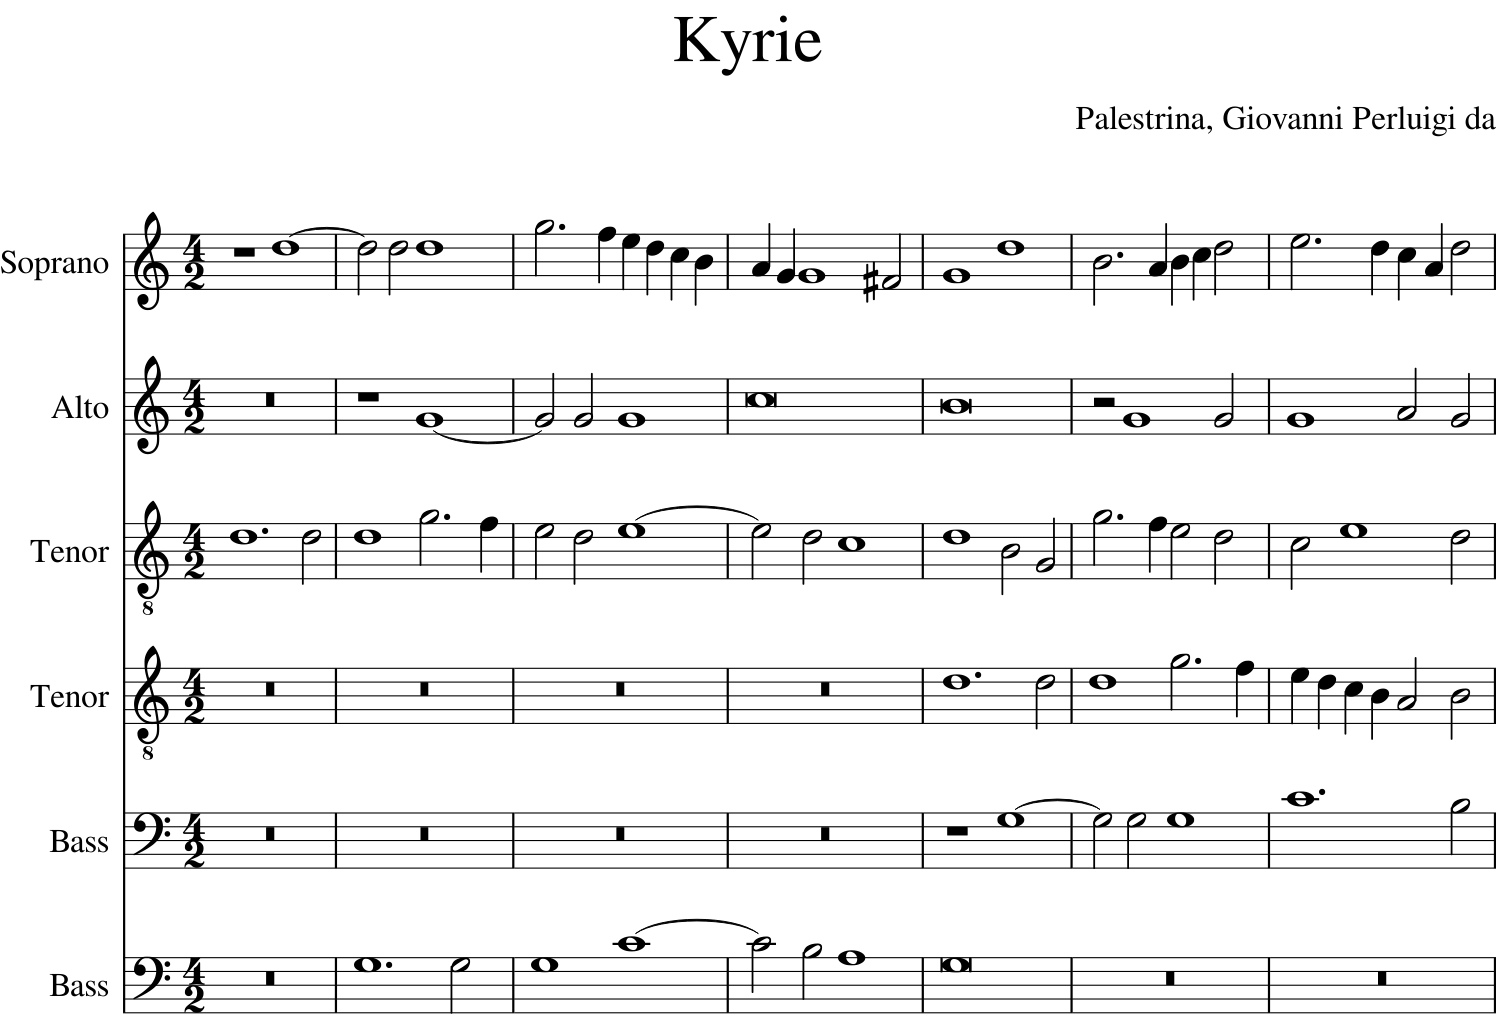

In [49]:
# is this the famous Missa Papae Marcelli?
s=corpus.parse(corpus3[0]) 
s.measures(1,7).show()

#### LEARNING TASK 1

*Was this the famous Missa Papae Marcelli? Can you attempt to find other famous masses from the corpus just using the titles (Sine Nomine, Spem in Alium, Missa Brevis). * 


In [29]:
# You could display all full titles of Palestrina's Kyries:
for work in corpus2:
    score = corpus.parse(work)
    print(score.metadata.parentTitle)


Missa Ad fugam
Missa Aeterna Christi munera
Missa Ascendo ad Patrem
Missa Ave Maria (1594)
Missa Ave Maria (1596)
Missa De Beata Marie Virginis (II)
Missa Octavi toni
Missa Panem nostrum
Missa Panis quem ego dabo
Missa Papae Marcelli
Missa Pater noster
Missa Ave regina coelorum
Missa De Beata Marie Virginis (III)
Missa Beatus Laurentius
Missa Benedicta es
Missa Brevis
Missa De Beata Marie Virginis (I)
Missa De beata virgine (1567)
Missa De feria
Missa Dum esset summus pontifex
Missa Descendit angelus Domini
Missa Dies sanctificatus
Missa Dilexi quoniam
Missa Ecce sacerdos magnus
Missa Emendemus in melius
Missa Fratres Ego Enim Accepi
Missa Gabriel Archangelus
Missa Gia fu chi m'ebbe cara
Missa In duplicibus minoribus (I)
Missa In duplicibus minoribus (II)
Missa Sine nomine (1567)
Missa Je suis desheritee
Missa Petra sancta
Missa Primi toni
Missa Qual e il piu grande'amore
Missa Quam pulchra es
Missa Quem dicunt homines
Missa Quinti toni
Missa Regina coeli (1600)
Missa Regina coeli (160

### 5.2 Corpus analysis of keys

Were the Bach chorales written in specific keys? Perhaps the keys with only have one or two sharps and flats were regularly utilised since they are easier to perform and notate? Are there more chorales in major mode than in minor? 

Let's look at the key distribution across chorales.

In [30]:
# We first select Bach 4-part works in music21
chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)
print(chorales)

<music21.metadata.bundles.MetadataBundle {319 entries}>


In [31]:
# Next we analyse these 319 entries and extract key from each
from music21 import*
import matplotlib.pyplot as plt # Load some extra plotting libraries

chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)

dict = {}
dict2 = {}
counter=1; maxlen = len(chorales)
for chorale in chorales:
   print('Analysing', counter,'/',maxlen, chorale.metadata.title,'...')
   score = corpus.parse(chorale)
   key = score.analyze('key').tonicPitchNameWithCase
   key2 = score.analyze('key').mode
   dict[key] = dict[key] + 1 if key in dict.keys() else 1
   dict2[key2] = dict2[key2] + 1 if key2 in dict2.keys() else 1
   counter +=1


Analysing 1 / 319 bwv10.7.mxl ...
Analysing 2 / 319 bwv101.7.mxl ...
Analysing 3 / 319 bwv102.7.mxl ...
Analysing 4 / 319 bwv103.6.mxl ...
Analysing 5 / 319 bwv104.6.mxl ...
Analysing 6 / 319 bwv108.6.mxl ...
Analysing 7 / 319 bwv11.6.mxl ...
Analysing 8 / 319 bwv110.7.mxl ...
Analysing 9 / 319 bwv113.8.mxl ...
Analysing 10 / 319 bwv114.7.mxl ...
Analysing 11 / 319 bwv115.6.mxl ...
Analysing 12 / 319 bwv117.4.mxl ...
Analysing 13 / 319 bwv121.6.mxl ...
Analysing 14 / 319 bwv122.6.mxl ...
Analysing 15 / 319 bwv123.6.mxl ...
Analysing 16 / 319 bwv126.6.mxl ...
Analysing 17 / 319 bwv127.5.mxl ...
Analysing 18 / 319 bwv13.6.mxl ...
Analysing 19 / 319 bwv133.6.mxl ...
Analysing 20 / 319 bwv14.5.mxl ...
Analysing 21 / 319 bwv140.7.mxl ...
Analysing 22 / 319 bwv144.3.mxl ...
Analysing 23 / 319 bwv144.6.mxl ...
Analysing 24 / 319 bwv145.5.mxl ...
Analysing 25 / 319 bwv148.6.mxl ...
Analysing 26 / 319 bwv151.5.mxl ...
Analysing 27 / 319 bwv153.1.mxl ...
Analysing 28 / 319 bwv153.5.mxl ...
Analy

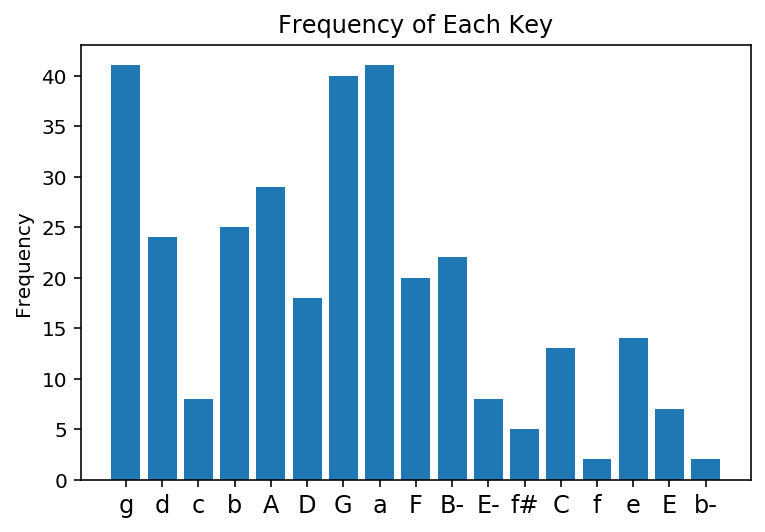

{'minor': 162, 'major': 157}


In [32]:
# Plot the results
ind = [i for i in range(len(dict))]
fig, ax = plt.subplots()
ax.bar(ind, dict.values())
ax.set_title('Frequency of Each Key')
ax.set_ylabel('Frequency')
plt.xticks(ind, dict.keys(), rotation='horizontal',size=12)
plt.show()
print(dict2) # print the frequency of major and minor keys

#### LEARNING TASK 2

*How do you interpret the key data of chorales? Note that within Bach chorales, there are also some modal chorales and sometimes the definition of the key is ambiguous.*

### Clarity of key (optional)
In the example above, we analysed the most likely in each chorael. There are some chorales where they key is ambiguous, which can be explored by obtaining the tonalCertainty measure, which underlies the key analysis.

In [33]:
chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)
print(chorales)

c=[]
title=[]
counter=0; maxlen = len(chorales)
for chorale in chorales:
   print('Analysing', counter,'/',maxlen, chorale.metadata.title,'...')
   score = corpus.parse(chorale)
   tc = score.analyze('key')
   c.append(tc.correlationCoefficient) # get the correlation to the highest key
   title.append(score.metadata.title)
   counter +=1


<music21.metadata.bundles.MetadataBundle {319 entries}>
Analysing 0 / 319 bwv10.7.mxl ...
Analysing 1 / 319 bwv101.7.mxl ...
Analysing 2 / 319 bwv102.7.mxl ...
Analysing 3 / 319 bwv103.6.mxl ...
Analysing 4 / 319 bwv104.6.mxl ...
Analysing 5 / 319 bwv108.6.mxl ...
Analysing 6 / 319 bwv11.6.mxl ...
Analysing 7 / 319 bwv110.7.mxl ...
Analysing 8 / 319 bwv113.8.mxl ...
Analysing 9 / 319 bwv114.7.mxl ...
Analysing 10 / 319 bwv115.6.mxl ...
Analysing 11 / 319 bwv117.4.mxl ...
Analysing 12 / 319 bwv121.6.mxl ...
Analysing 13 / 319 bwv122.6.mxl ...
Analysing 14 / 319 bwv123.6.mxl ...
Analysing 15 / 319 bwv126.6.mxl ...
Analysing 16 / 319 bwv127.5.mxl ...
Analysing 17 / 319 bwv13.6.mxl ...
Analysing 18 / 319 bwv133.6.mxl ...
Analysing 19 / 319 bwv14.5.mxl ...
Analysing 20 / 319 bwv140.7.mxl ...
Analysing 21 / 319 bwv144.3.mxl ...
Analysing 22 / 319 bwv144.6.mxl ...
Analysing 23 / 319 bwv145.5.mxl ...
Analysing 24 / 319 bwv148.6.mxl ...
Analysing 25 / 319 bwv151.5.mxl ...
Analysing 26 / 319 bwv

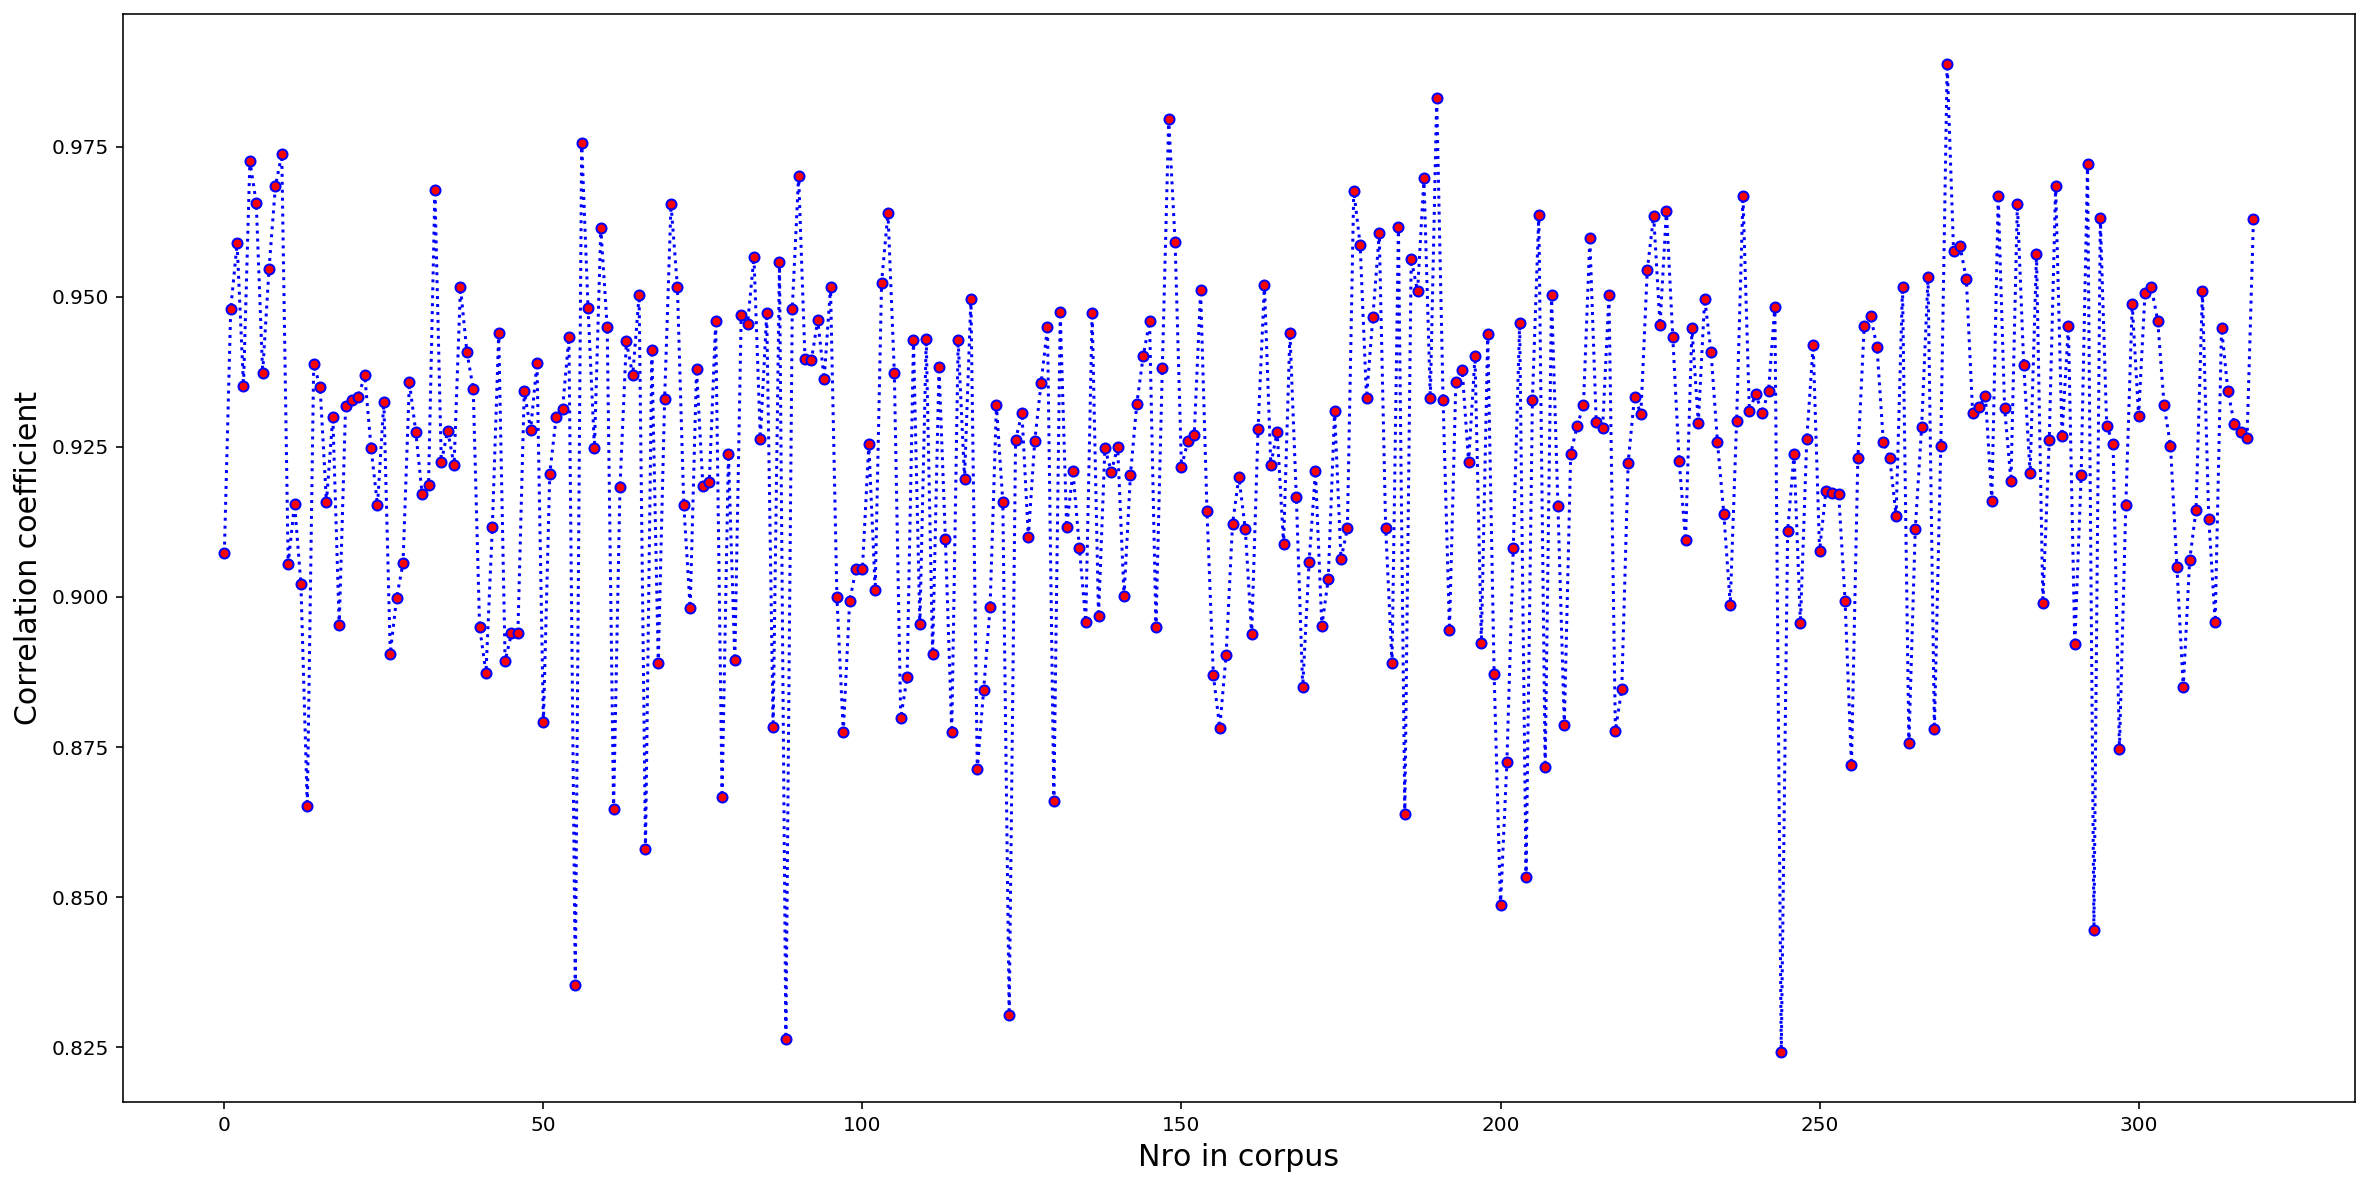

In [34]:
# Let's see what the correlations look like

fig, ax = plt.subplots()
ax.plot(c, 'bo:',markersize=5,markerfacecolor='r')
fig.set_size_inches(20, 10)
ax.set_ylabel('Correlation coefficient',size=15)
ax.set_xlabel('Nro in corpus',size=15)
plt.show()


Ambiguous keys can be found in: [55, 88, 123, 200, 244, 293]
bwv364.mxl : 0.8486105841122339


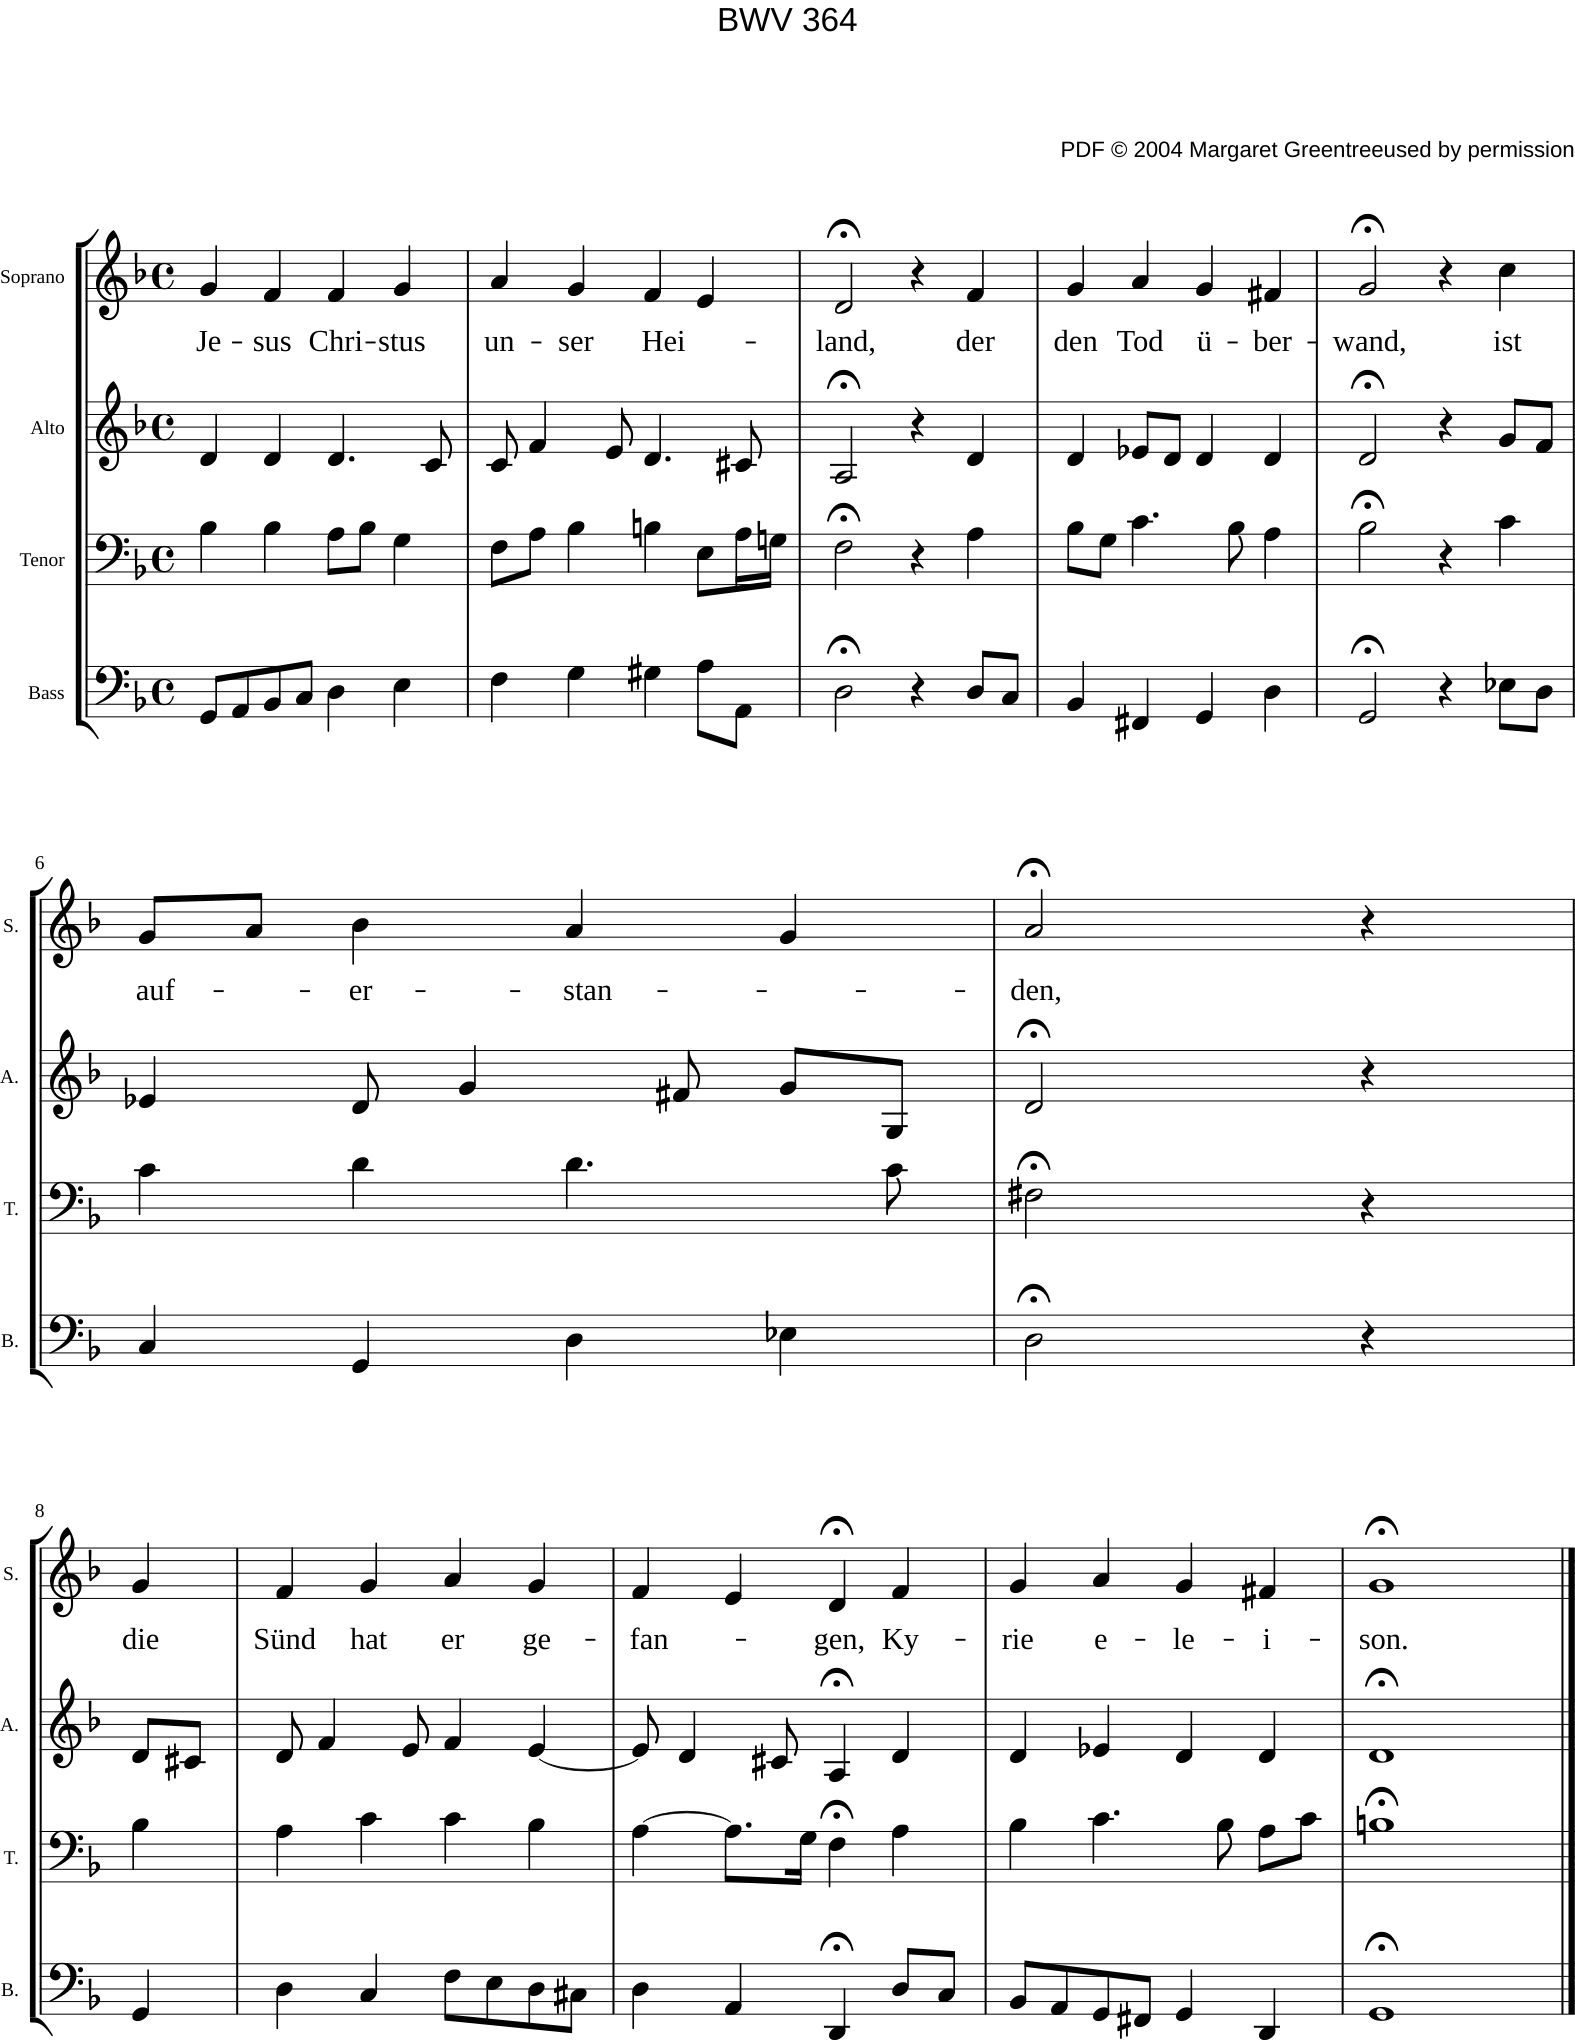

In [35]:
# There are few chorales where the correlations are lower than the other chorales, say under 0.85. 
# Let's look at those chorales

ambiguous = [ n for n,i in enumerate(c) if i < 0.85 ] # get indices of tonally ambiguous chorales.
print('Ambiguous keys can be found in:',ambiguous)

# let's look at one of these
score = corpus.parse(chorales[ambiguous[3]])
tc = score.analyze('key')
print(score.metadata.title,':',tc.correlationCoefficient)
score.show()

# This is G minor Dorian

### 5.2 Corpus analysis of vocal range

**Are the basses expected to sing over a larger range than the tenors? **

Has the vocal range been the same for SATB works over the centuries? Of course we do not always know what pitch was the score originally mapped onto but at least the vocal ranges should be comparable between in soprano, alto, tenor and bass voices.

Let's explore the vocal ranges.

In [36]:
import statistics
# Start with Bach chorales
chorales = corpus.search(composer='J.S. Bach',numberOfParts=4)

soprano_range = []
alto_range = []
tenor_range = []
bass_range = []
for chorale in chorales:                                          # Loop across chorales
    s = corpus.parse(chorale)
    for el in s.recurse().parts:                                  # Loop across the parts
        #print(el.offset, el, el.analyze('range').semitones)
        #print(el.partName)
        if 'Soprano' in el.partName:
            soprano_range.append(el.analyze('range').semitones)   # Calculate range if the part is soprano
        if 'Alto' in el.partName:
            alto_range.append(el.analyze('range').semitones)
        if 'Tenor' in el.partName:
            tenor_range.append(el.analyze('range').semitones)
        if 'Bass' in el.partName:
            bass_range.append(el.analyze('range').semitones)
# Summarise the results
print('Soprano', round(statistics.mean(soprano_range),2))
print('Alto', round(statistics.mean(alto_range),2))
print('Tenor', round(statistics.mean(tenor_range),2))
print('Bass', round(statistics.mean(bass_range),2))

Soprano 11.79
Alto 11.43
Tenor 12.58
Bass 18.12


#### LEARNING TASK 3

*Which part had the largest range and why? Is this related to the Bach chorales or would similar results be evident in another, polyphonic vocal corpus? You could try Monteverdi (replace 'J.S. Bach' with 'Monteverdi', change the 'NumberOfParts' to 6, and also replace 'Soprano' with 'Canto' and 'Bass' with 'Basso'.*


## 3 Corpus search

Sometimes the useful approach is not to summarise the entire collection of music in terms of a specific feature but to search for a musical excerpt. Let's search the corpus for a theme that we have in mind. First we will select a suitable corpus of music and then search for a theme with or without the rhythms.

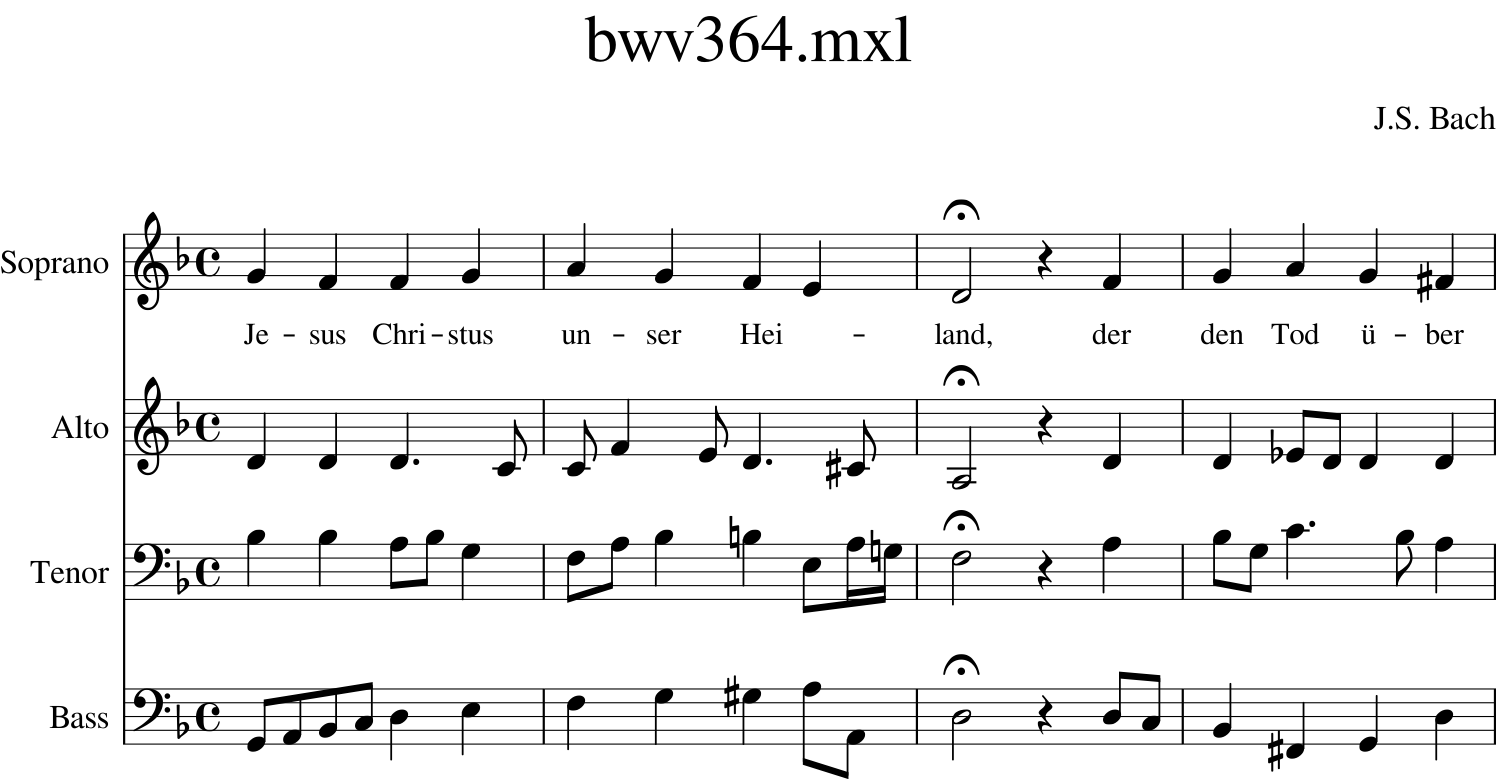

In [37]:
from music21 import *
## Select all Bach Chorales
chorales = corpus.search(composer='J.S. Bach')
chorales2 = corpus.search('bwv364') # Let's get the Dorian chorale again
bwv364=corpus.parse(chorales2[0]) # Put it into a specific variable for convenience
bwv364.measures(0, 4).show() # Display the notation

### 3.1 Theme search (pitch only)

In [38]:
# define a theme to search. Let's first try a simple theme (G F E) without considering the rhythm.
searchList = [note.Note('G'), note.Note('F'), note.Note('E')] # define a search pattern G-F-E
s = bwv364.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchList) # executes the search

# show were the exact matches were
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)
# This report below shows in which voice, in which bar and which beat, does the theme occur: 

<music21.note.Note G> 2 2.0 <music21.stream.Part Soprano>
<music21.note.Note G> 8 4.0 <music21.stream.Part Soprano>


### 3.2 Theme search (pitch and rhythm)
The search above was simple and unrealistic. Let's search for a real theme with note durations
Let's find the theme from "Vom Himmel hoch, da komm ich her" ("From Heaven Above to Earth I Come"), which was supposedly composed by Luther in 1539. The theme has been used in Bach's Christmas oratorio, but which chorale does it come from? Here we want to preserve the rhythm as well.

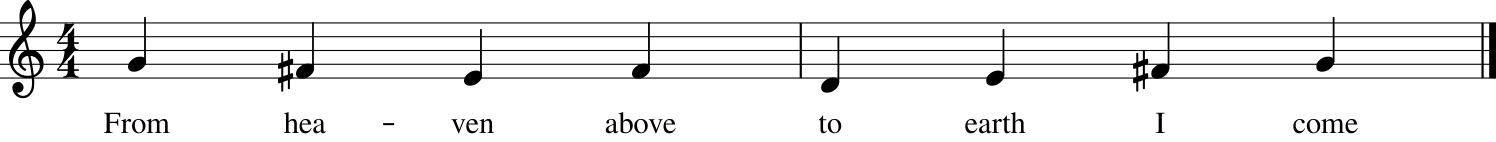

In [39]:
# Define the theme "From Heaven Above to Earth I Come")
theme = converter.parse("tinynotation: 4/4 g4_From f#_hea- e_ven f#_above d_to e_earth f#_I g_come")
theme.show()

In [40]:
# Here we want to preserve the approximate rhythm, but I will make all notes equally long (crotchets).
searchStream2 = stream.Stream([key.KeySignature(1),
                               note.Note('G4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('D4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('G4', type='quarter')])

target1=[]
target2=[]
import time
t = time.time()
for i in range(100): # loop through the first 100 chorales ...
    tmp = chorales[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # loop through different transpositions (up to 12 semitones)
        s2=searchStream2.transpose(unused)
        entryPoints = search.noteNameRhythmicSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
    #print(i,target2[i])
    target1=[]
elapsed = time.time() - t
print('Done! This search took',round(elapsed,1),'seconds')

Done! This search took 24.0 seconds


These works contain the theme: [93]


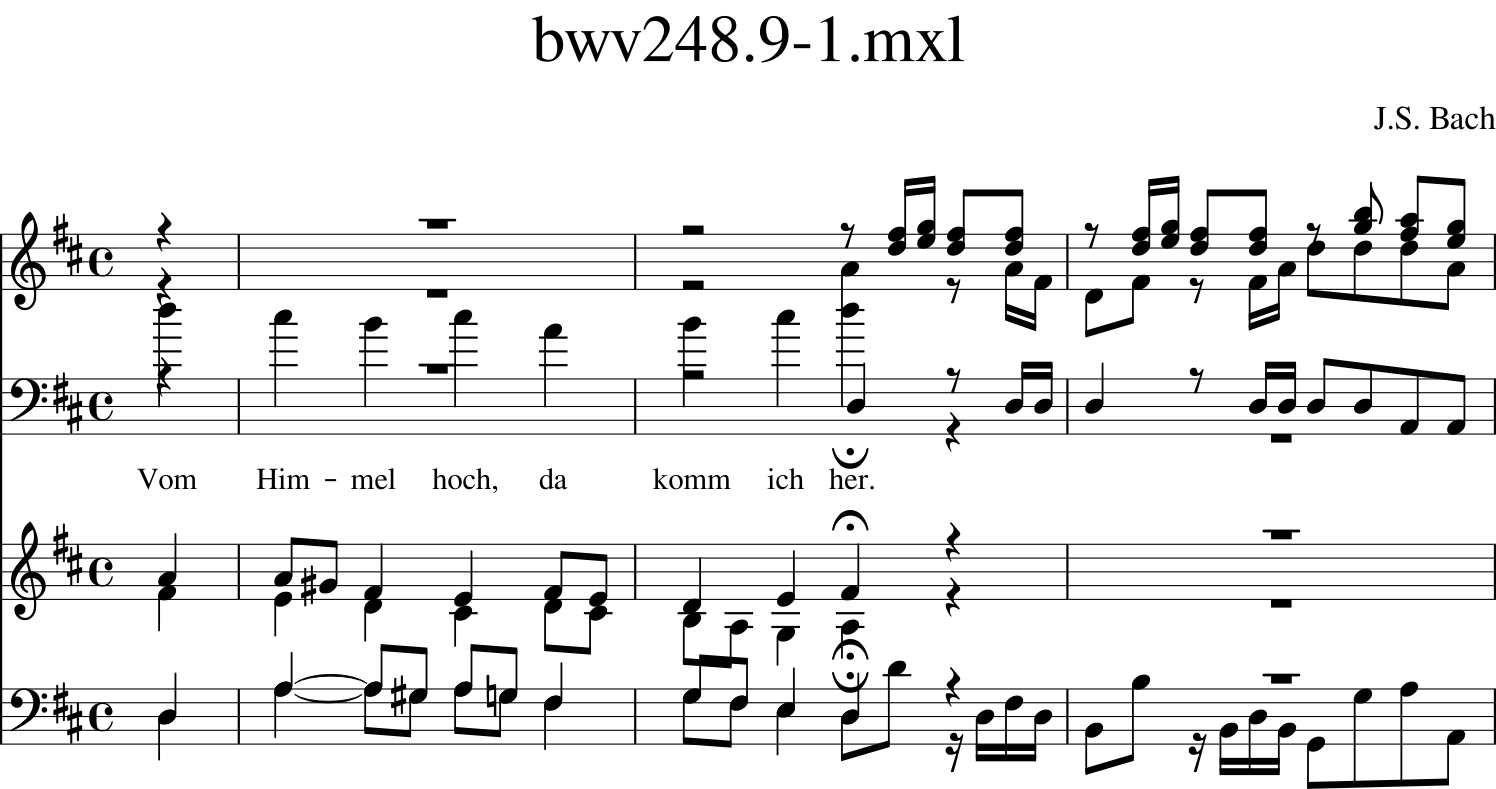

In [41]:
# Display results
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)

catalog = stream.Opus()

for i in range(0,len(hits)):
    tmp=chorales[hits[i]].parse()
    incipit = tmp.measures(0,3)
    catalog.insert(0, incipit.implode())
catalog.show() # Display the works that contain the theme

### 3.3 Search for the same theme in other collections

In [43]:
# Has the theme from "Vom Himmel hoch, da komm ich her" used earlier?

palestrina = corpus.search('palestrina')
print(palestrina)

# let's allow some rhythmic variations and remove the note durations from the search
searchStream3 = stream.Stream([key.KeySignature(1),
                               note.Note('G4'),
                               note.Note('F#4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('D4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('G4')])
target1=[]
target2=[]
import time
t = time.time()
for i in range(100):
    tmp = palestrina[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # unison to seventh
        s2=searchStream3.transpose(unused)
        entryPoints = search.noteNameSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
    print(i,target2[i])
    target1=[]
print('Done! This search took',round(elapsed,1),'seconds')
    
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)


<music21.metadata.bundles.MetadataBundle {1318 entries}>
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 1
11 0
12 1
13 0
14 0
15 0
16 0
17 1
18 1
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 2
27 1
28 0
29 0
30 0
31 0
32 0
33 2
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 1
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 1
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
Done! This search took 24.0 seconds
These works contain the theme: [10, 12, 17, 18, 26, 27, 33, 41, 76]


[10, 12, 17, 18, 26, 27, 33, 41, 76]
<music21.note.Note B-> 10 1.0 <music21.stream.Part spine_4>


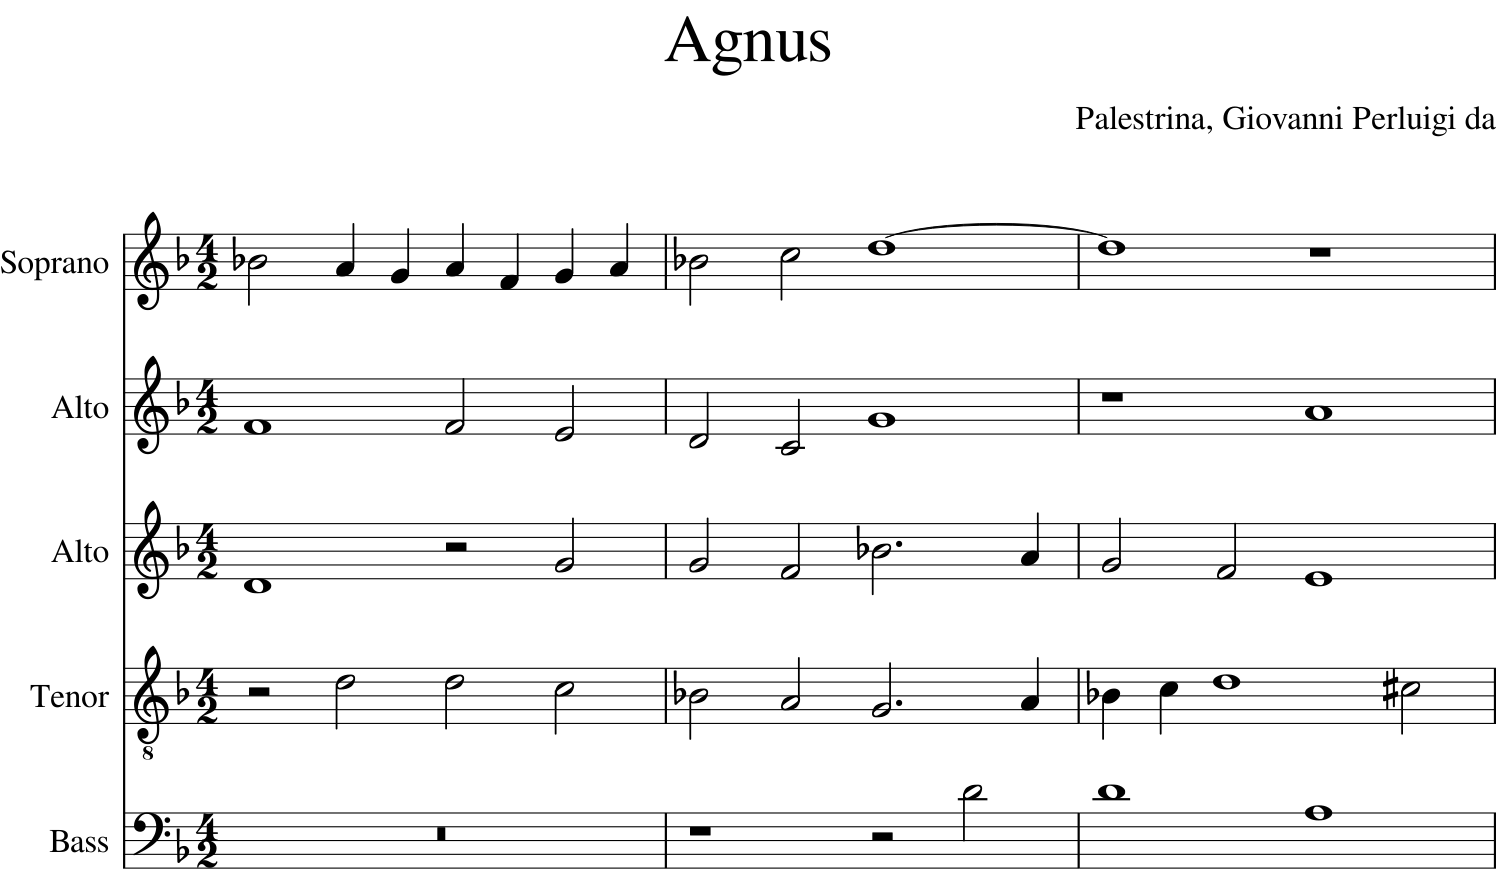

In [44]:
# display one example
print(hits)
tmp=palestrina[hits[3]].parse()        # We are looking at the fourth example in the list above
s = tmp.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchStream3) # executes the search
target1=[]
target2=[]
for unused in range(12): # unison to seventh
    s2=searchStream3.transpose(unused)
    entryPoints = search.noteNameSearch(s, s2.notes)
    len1=len(entryPoints)
    target1.append(len1)
tr=[i for i, x in enumerate(target1) if x]

# show were the exact matches were
s2=searchStream3.transpose(tr[0])
p = search.noteNameSearch(s, s2.notes) # executes the search
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)
tmp.measures(10, 12).show()


#### LEARNING TASK 4

Can you find the resemblance to the search pattern? What is the main difference? Do you think this is a coincidence or an actual precursor of the theme? How would you try to establish a link if you wished to do so? 


## 4 References

* Cuthbert, M. S., & Ariza, C. (2010). music21: A Toolkit for Computer-Aided Musicology and Symbolic Music Data. In J. Stephen Downie and Remco C. Veltkamp (Eds.). 11th International Society for Music Information Retrieval Conference (ISMIR 2010), August 9-13, 2010, Utrecht, Netherlands. pp. 637-642. [link](http://ismir2010.ismir.net/proceedings/ismir2010-108.pdf)

* Cuthbert, M. S., Ariza, C., & Friedland, L. (2011). Feature Extraction and Machine Learning on Symbolic Music using the music21 Toolkit. In 11th International Society for Music Information Retrieval Conference (ISMIR 2011) (pp. 387--392). [link](http://ismir2011.ismir.net/papers/PS3-6.pdf)
